<a href="https://colab.research.google.com/github/khixson1/Drug_Recommendation_Model/blob/main/Drug_Recomendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Drug Recommendations

Kim Hixson

# Drug Recommendation To Doctors
Data science strategies (EDA and modeling) are used here to help doctors recommend the best type of drug treatment for at-risk patients. Models tested in this dataset include a Decision Tree Classifier, Logistic Regression, and KN nearest neighbors.

# Importing libraries, Mounting Google Drive, Loading Dataset, Viewing Data Structure

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Imports
import pandas as pd
import numpy as np

# Import seaborn and matplotlib to make nice visuals for exploratory data visualization and confusion matricies
import seaborn as sns
import matplotlib.pyplot as plt

# Imports for viewing pipeline
from sklearn import set_config
set_config(display='diagram')

# Import necessary tools for model validation, data transformation and pipeline creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import classification_report, confusion_matrix

# Importing Classifiers and Regressors
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Importing ROC AUC scoring and ROC curve plotting
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_curve

In [8]:
# Load Dataset
filename = '/content/drive/MyDrive/Colab_Notebooks/Coding Dojo/DataScience_Stack1/Week_4_DataScienceFundamentals_ExplanatoryDataViz/Data_Uploads/drug_rec_datatable.csv'

df = pd.read_csv(filename)

display(df.head())
display(df.tail())
display(df.shape)

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


,Age,Gender,BP,Cholesterol,Na_to_K,Drug
291,44.0,F,High,HIGH,12.854,drugQ
292,NaN,F,Normal,HIGH,10.065,drugZ
293,49.0,M,Low,NORMAL,11.014,drugZ
294,29.0,F,High,NORMAL,9.475,drugQ
295,28.0,F,Normal,HIGH,12.879,drugZ


(296, 6)

Note: Dataset loaded. Dataset contains missing values. 'Age' and 'Na_to_K' are continuous, 'Gender', 'Choleserol' and 'Drug' appears to be binary but we will verify, 'BP' appears to be multi-class.

#Prepare/clean the data for exploratory analysis purposes
1. Handle missing values by using an appropriate imputation strategy (instead of dropping rows).
2. Write a justification of your strategy for imputing missing values.
3. Make sure you avoid any data leakage when you impute values.
4. Ensure data types match the data types listed in the data dictionary.
5. Check for and address any inconsistent values in categorical columns.
6. Check for and address any impossible values in numeric columns.

In [9]:
# check column names for spaces or other problematic strings
df.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Note: Column names appear normal with no spaces or other artifacts

In [10]:
# Check for strange data patterns, strings in numeric columns, missing data
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    object 
 5   Drug         296 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.0+ KB


None

Note: There appears to be something amiss with the Na_to_K column. For some reason this column of continuous values is showing up as an object. We will investigate what the problem is next.

In [15]:
# Identify row in 'Na_to_K' in the dataframe (df) which is causing the mismatch and is forcing this column to be an 'object'

#df['Na_to_K'] = pd.to_numeric(df['Na_to_K'])      #THIS CODE GIVES AN ERROR REFERING TO A STRING '10.403_'


Note: The above cell threw an error identifying a string '10.403_' at position 270. I will convert this string back to a float and I will test the column again for other strings.

In [16]:
# View string row
odd_string = df['Na_to_K'] == '10.403_'
df[odd_string]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
270,NaN,M,High,HIGH,10.403_,drugQ


In [17]:
# Replace erroneous string and convert column to numerical data

# replace string '10.403_' with a float of '10.403' (https://pretagteam.com/question/how-to-delete-the-cell-from-python-pandas-dataframe)
df.at[270, 'Na_to_K'] = '10.403'

df['Na_to_K'].loc[270]

'10.403'

In [18]:
# Coerce 'Na_to_K' column to be numeric
df['Na_to_K'] = pd.to_numeric(df['Na_to_K'])

# Check to see if change was successful
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    float64
 5   Drug         296 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


None

Note: Changing 10.403_ to 10.403 along with transfroming the 'Na_to_K' column to numeric appears to be successful

In [19]:
# Check for outliers in numeric data
display(df.describe())

,Age,Na_to_K
count,237.000000,296.000000
mean,47.523207,14.709355
std,37.700488,6.364668
min,15.000000,6.269000
25%,32.000000,10.445250
50%,45.000000,12.856000
75%,59.000000,16.732000
max,570.000000,38.247000


Note: While I assume 'Na_to_K' value ranges are appropriate, the 'Age' column with a max = 570 appears to be an error.  I will assume there was an entry error where this value was supposed to be 57 instead of 570. I will change the outlier to 57.

In [20]:
# View outlier row
age_outlier = df['Age'] == 570.0
df[age_outlier]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
232,570.0,F,Normal,HIGH,14.216,drugZ


In [21]:
# Replace outlier of 570.0 with 57.0
df.at[232, 'Age'] = 57.0

df['Age'].loc[232]

57.0

In [22]:
# Check again for outlier in numeric data
display(df.describe())

,Age,Na_to_K
count,237.000000,296.000000
mean,45.358650,14.709355
std,16.133778,6.364668
min,15.000000,6.269000
25%,32.000000,10.445250
50%,45.000000,12.856000
75%,59.000000,16.732000
max,74.000000,38.247000


Note: The age range in the 'Age' column now seems reasonable

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    float64
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    float64
 5   Drug         296 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


In [24]:
# Convert Age to integer so that the data type matches what is provided in the data dictionary
df['Age'] = df['Age'].astype('Int64')

Source: https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe

In [25]:
# Check categorical columns for odd or inconsistant names

# value_counts of 'Gender' column
gender_cat = pd.Series(df['Gender']).value_counts()
display(gender_cat)
print('________________________________________')

# value_counts of 'BP' column
BP_cat = pd.Series(df['BP']).value_counts()
display(BP_cat)
print('________________________________________')

# value_counts of 'Cholesterol' column
Chol_cat = pd.Series(df['Cholesterol']).value_counts()
display(Chol_cat)
print('________________________________________')

# value_counts of 'Drug' column
Drug_cat = pd.Series(df['Drug']).value_counts()
display(Drug_cat)
print('________________________________________')

M         149
F         137
male        4
female      2
Female      1
Male        1
femal       1
Femal       1
Name: Gender, dtype: int64

________________________________________


High      142
Normal     46
Low        33
Name: BP, dtype: int64

________________________________________


HIGH      156
NORMAL    117
norm        9
high        8
NORM        6
Name: Cholesterol, dtype: int64

________________________________________


drugQ    148
drugZ    148
Name: Drug, dtype: int64

________________________________________


Note: The 'Gender' column is binary but there are several distinct entries for male and female. The 'Cholesterol' column also is binary but contains several entries to represent high and normal. We will correct these in the following code.

Source: Class notes/exercises

In [26]:
# Create 'Gender' and 'Cholesterol' dictionaries and then coerce categories to one standard that matches the names in the data dictionary

gender_dict = {'male':'M', 'female':'F', 'Female':'F', 'Male':'M', 'femal':'F', 'Femal':'F'}
chol_dict = {'norm':'normal', 'NORM':'normal', 'High':'high', 'NORMAL':'normal', 'HIGH':'high'}
BP_dict = {'Low':'low','Normal':'normal', 'High':'high'}


df = df.replace({'Gender': gender_dict})
df = df.replace({'Cholesterol': chol_dict})
df = df.replace({'BP': BP_dict})

display(df.head())
display(df.info())

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59,M,high,high,13.935,drugQ
1,40,F,normal,high,10.103,drugZ
2,<NA>,M,normal,high,9.084,drugZ
3,62,M,normal,high,16.594,drugZ
4,55,F,high,normal,10.977,drugQ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          237 non-null    Int64  
 1   Gender       296 non-null    object 
 2   BP           221 non-null    object 
 3   Cholesterol  296 non-null    object 
 4   Na_to_K      296 non-null    float64
 5   Drug         296 non-null    object 
dtypes: Int64(1), float64(1), object(4)
memory usage: 14.3+ KB


None

Source: https://stackoverflow.com/questions/67039036/changing-category-names-in-a-pandas-data-frame

Note: Categories now appear to match the data dictionary provided with the dataset

In [27]:
# Check to see if changes made were correct
# value_counts of 'Gender' column

gender_cat = pd.Series(df['Gender']).value_counts()
display(gender_cat)
print('________________________________________')

# value_counts of 'BP' column
BP_cat = pd.Series(df['BP']).value_counts()
display(BP_cat)
print('________________________________________')

# value_counts of 'Cholesterol' column
Chol_cat = pd.Series(df['Cholesterol']).value_counts()
display(Chol_cat)
print('________________________________________')

# value_counts of 'Drug' column
Drug_cat = pd.Series(df['Drug']).value_counts()
display(Drug_cat)
print('________________________________________')

M    154
F    142
Name: Gender, dtype: int64

________________________________________


high      142
normal     46
low        33
Name: BP, dtype: int64

________________________________________


high      164
normal    132
Name: Cholesterol, dtype: int64

________________________________________


drugQ    148
drugZ    148
Name: Drug, dtype: int64

________________________________________


Note: All categorical column classes are standardized now and match the data dictionary

In [28]:
# Checking on missing values
df.isnull().sum()

Age            59
Gender          0
BP             75
Cholesterol     0
Na_to_K         0
Drug            0
dtype: int64

Note: I have missing values in both the 'Age' numeric column and the 'BP' categorical column. I will need to impute for both numeric and categorical data

In [29]:
# Checking for duplicated rows
df.duplicated().sum()

15

Note: There are 15 duplicated rows.  I will drop these rows.

In [30]:
# Checking shape prior to dropping rows
df.shape

(296, 6)

In [31]:
# Dropping duplicated row entries
df.drop_duplicates()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59,M,high,high,13.935,drugQ
1,40,F,normal,high,10.103,drugZ
2,<NA>,M,normal,high,9.084,drugZ
3,62,M,normal,high,16.594,drugZ
4,55,F,high,normal,10.977,drugQ
...,...,...,...,...,...,...
290,51,M,high,high,18.295,drugZ
292,<NA>,F,normal,high,10.065,drugZ
293,49,M,low,normal,11.014,drugZ
294,29,F,high,normal,9.475,drugQ


Note: The duplicated rows were dropped. The dataframe now has 281 rows and 6 columns.

In [32]:
# Check for balance in the 'Drug' target vector
df['Drug'].value_counts(normalize=True)

drugQ    0.5
drugZ    0.5
Name: Drug, dtype: float64

Note: The 'Drug' classes are perfectly balanced so there is no need to stratify or to worry about balance affecting the model

In [33]:
# I will convert the 'Drug' Category to binary numbers: 0 = 'drugQ' and 1 = 'drugZ'
target_dict = {'drugQ':0, 'drugZ':1}
df = df.replace({'Drug': target_dict})

In [34]:
# Model Validation, impute missing values uniquely for numeric and categorical data, to scale the data and implore one-hot-encoding on categorical data

# Define numerical dataset and categorical dataset
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Define features matrix (X) and target vector (y) in our dataset
X = df.drop(columns='Drug')
y = df['Drug']

# Model Validation (Train-Test-Split) to prevent data leakage (no need to stratify with balanced dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate transformers needed. In this case we need a scaler, onehotencoding to make categorical values numeric,
# and we need to impute both categorical values with 'most frequent' and numeric values with 'median' (best for integers).
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
median_imputer = SimpleImputer(strategy='median', missing_values=np.nan) # imputer for numerical data
freq_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan) # imputer for categorical data

#Exploration of the data
Create at least two different types of exploratory visualizations.
Write one to two sentences about what each visualization tells you about the data. I will impute and do one hot encoding here on training data just to put it into a form to view with my exploratory visualizations

In [35]:
# View categorical and numeric columns in training features matrix, convert to dataframes if need be, sort and reset index
# This is to prepare a matrix for viewing all values in a correlation plot

cat_data = X_train[cat_selector(X_train)]
cat_data = cat_data.sort_index()
cat_data.reset_index(drop=True, inplace=True)

num_data = X_train[num_selector(X_train)]
num_data = num_data.sort_index()
num_data.reset_index(drop=True, inplace=True)

target = pd.DataFrame(y_train)
target_data = target[num_selector(target)]
target_data = pd.DataFrame(target_data)
target_data = target_data.sort_index()
target_data.reset_index(drop=True, inplace=True)


Source: Class Notes/Exercises
Source: Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html

In [39]:
# Impute missing values in category columns
freq_imputer.fit(cat_data)
cat_impute = freq_imputer.transform(cat_data)
cat_impute

ohe_encoder.fit(cat_impute)
cat_ohe = ohe_encoder.transform(cat_impute)
cat_ohe

# View Dataset
cat_ohe_df = pd.DataFrame(cat_ohe, columns=ohe_encoder.get_feature_names_out(cat_data.columns))
display(cat_ohe_df.head())
display(cat_ohe_df.shape)
display(cat_ohe_df.isnull().sum())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Gender_F,Gender_M,BP_high,BP_low,BP_normal,Cholesterol_high,Cholesterol_normal
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0


(222, 7)

Gender_F              0
Gender_M              0
BP_high               0
BP_low                0
BP_normal             0
Cholesterol_high      0
Cholesterol_normal    0
dtype: int64

In [40]:
# Impute missing values in numerical columns and scale data
median_imputer.fit(num_data)
num_impute = median_imputer.transform(num_data)

# View Dataset
num_imput_df = pd.DataFrame(num_impute, columns=['Age', 'Na_to_K'])
display(num_imput_df.head())
display(num_imput_df.shape)
display(num_imput_df.isnull().sum())

,Age,Na_to_K
0,59.0,13.935
1,40.0,10.103
2,45.0,9.084
3,62.0,16.594
4,55.0,10.977


(222, 2)

Age        0
Na_to_K    0
dtype: int64

In [41]:
# combine column-wise the X_train and y_train data which have all been coverted to numerical data
df_numeric = pd.concat([num_imput_df, cat_ohe_df, target_data], axis=1)
df_numeric = pd.DataFrame(df_numeric)
display(df_numeric.head())
display(type(df_numeric))

,Age,Na_to_K,Gender_F,Gender_M,BP_high,BP_low,BP_normal,Cholesterol_high,Cholesterol_normal,Drug
0,59.0,13.935,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
1,40.0,10.103,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,45.0,9.084,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
3,62.0,16.594,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1
4,55.0,10.977,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


pandas.core.frame.DataFrame

In [42]:
# Make X_train and y_train with just numeric data
X_train_num = df_numeric.drop(columns='Drug')
y_train_num = df_numeric['Drug']

display(X_train_num.head())
display(y_train_num.head())

,Age,Na_to_K,Gender_F,Gender_M,BP_high,BP_low,BP_normal,Cholesterol_high,Cholesterol_normal
0,59.0,13.935,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,40.0,10.103,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,45.0,9.084,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,62.0,16.594,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,55.0,10.977,1.0,0.0,1.0,0.0,0.0,0.0,1.0


0    0
1    1
2    1
3    1
4    0
Name: Drug, dtype: int64

,Age,Na_to_K,Gender_F,Gender_M,BP_high,BP_low,BP_normal,Cholesterol_high,Cholesterol_normal,Drug
Age,1.000000,-0.108836,-0.200016,0.200016,0.000562,0.075747,-0.067148,0.078076,-0.078076,-0.116301
Na_to_K,-0.108836,1.000000,0.148517,-0.148517,-0.147276,0.174127,0.021138,0.003807,-0.003807,0.518148
Gender_F,-0.200016,0.148517,1.000000,-1.000000,0.051248,-0.069885,0.000802,-0.065086,0.065086,0.061931
Gender_M,0.200016,-0.148517,-1.000000,1.000000,-0.051248,0.069885,-0.000802,0.065086,-0.065086,-0.061931
BP_high,0.000562,-0.147276,0.051248,-0.051248,1.000000,-0.562187,-0.687824,0.050065,-0.050065,-0.763635
BP_low,0.075747,0.174127,-0.069885,0.069885,-0.562187,1.000000,-0.213623,-0.140907,0.140907,0.429306
BP_normal,-0.067148,0.021138,0.000802,-0.000802,-0.687824,-0.213623,1.000000,0.064535,-0.064535,0.525246
Cholesterol_high,0.078076,0.003807,-0.065086,0.065086,0.050065,-0.140907,0.064535,1.000000,-1.000000,-0.159968
Cholesterol_normal,-0.078076,-0.003807,0.065086,-0.065086,-0.050065,0.140907,-0.064535,-1.000000,1.000000,0.159968
Drug,-0.116301,0.518148,0.061931,-0.061931,-0.763635,0.429306,0.525246,-0.159968,0.159968,1.000000


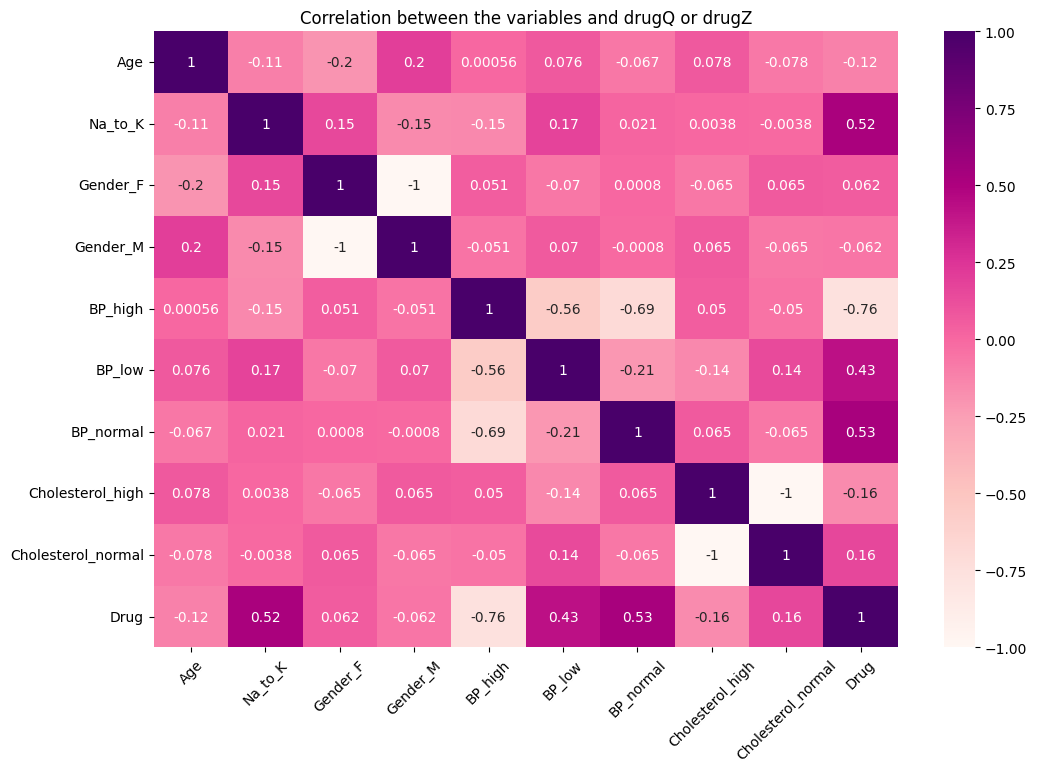

In [43]:
# Perform a pairwise correlation between the training data and target vector
corr = df_numeric.corr()
display(corr)

# Create a seaborn pairwise correlation plot
plt.subplots(figsize=(12,8));
sns.heatmap(corr,annot=True,cmap='RdPu');
plt.title('Correlation between the variables and drugQ or drugZ');
plt.xticks(rotation=45);

# Exploratory Visual 1: Correlation Heatmap
1. This heatmap shows that 'drugZ' is most highly correlated with low-normal blood pressure, and high Na/K ratios. Drug Z was also given more to younger people.  

2. This heatmap also shows that 'drugQ' however is given to more older patients with high cholesterol and high blood pressure.

3. One can conclude from this heatmap that patients with low or normal blood pressure or who have high sodium to potassium blood ratio are most often given drugZ while patients with high blood pressure and low Na/K ratios are most often given drugQ.



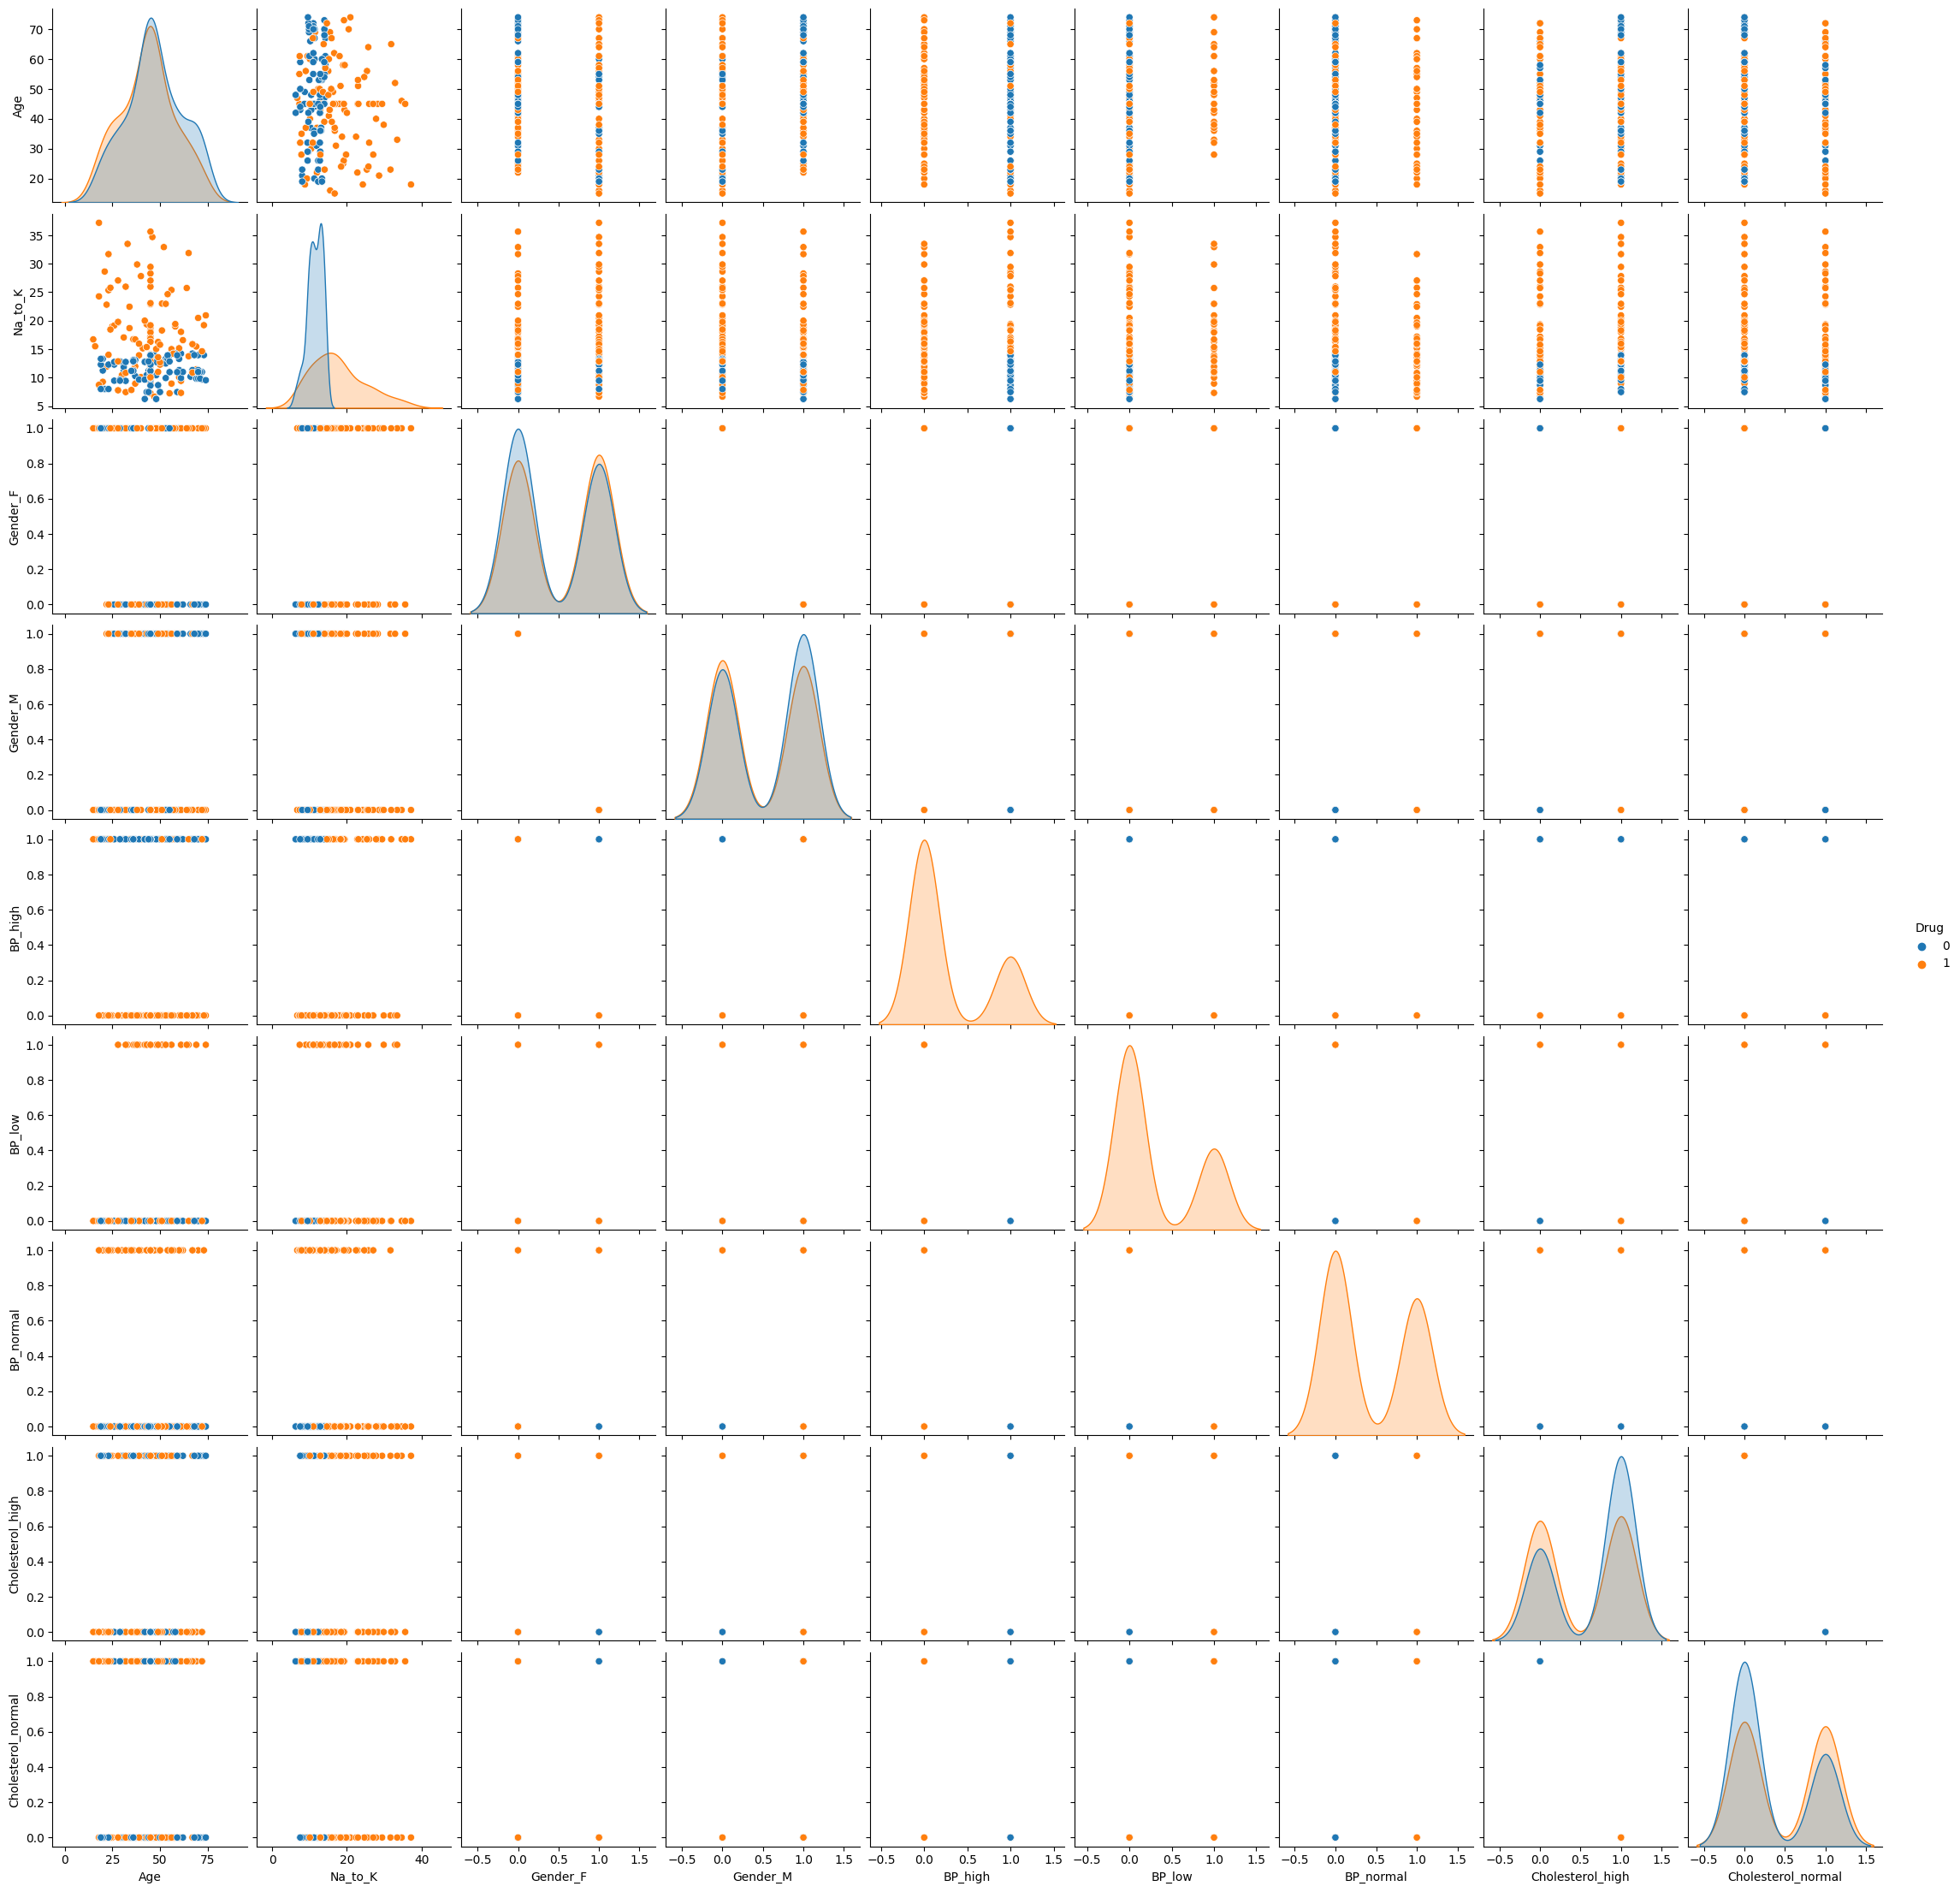

In [44]:
# Pairplot to visualize other univariate and multivariate comparisons
# pairplot with hue

sns.pairplot(df_numeric, hue ='Drug')
# to show
plt.show()

# Exploratory Visual 2: Seaborn Pairplot of Numerical Training  Dataset (Blue=0=drugQ)(Orange=1=drugZ)

1. There are only small difference due to gender and age. There is a small bias towards giving older males drugQ more frequently than older females who receive drugZ more frequently instead.

2. People with blood pressure and low Na/K ratios were given drugQ exclusively. People with low or normal blood pressure were given drugZ exclusively in our training dataset.


# Prepare the data appropriately for modeling
1. Implement a preprocessing pipeline to avoid data leakage.
2. Scale the data if your model requires it.
3. Write a justification for how you encode the variables (ordinal encoding vs one-hot encoding).

### 1. I already defined my feature matrix and target vector above.

###2. My preprocessing pipeline will include scaling since I plan to use a Logistic Regression Classifier and a KNN Classifier which needs scaling. I also plan to use a Decision Tree Classifier which does not need scaling but will not be harmed by scaled data.

###3. I chose to use one hot encoding for all categorical data since I did not think ranking any of the categorical data would be beneficial for a model to predict which drug a doctor would dispense to a given patient.

In [45]:
# Make numeric and categorical pipelines for each data type
num_pipe = make_pipeline(median_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

In [46]:
# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [47]:
# Make column transformer pipeline to impute and transform different data types
col_trans = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff7532e0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff750c40>)])

# Create and compare at least 2 different model types to predict drug type.
1. Put your preprocessing and models into pipelines.
2. For each model type, create a default version of each model with default hyperparameters.
3. Create additional versions of each model type where you tune hyperparameters for each model.
4. Use appropriate metrics to evaluate each model.

For comparison, I will evaluate the 3 following Classifier Models on this dataset:

1. Decision Tree Classifier
2. Logistic Regression Classifier
3. K-Nearest Neighbors Classifier

In [48]:
# Make Decision Tree Classifier Pipeline
# Make an instance of the model
dec_tree = DecisionTreeClassifier(random_state=42)

# Make pipeline with model
dec_pipe = make_pipeline(col_trans, dec_tree)
dec_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff7532e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff750c40>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [49]:
# Make Logistic Regression Classifier
# Make an instance of the model
logreg = LogisticRegression(random_state=42)

# Make pipeline with model
logreg_pipe = make_pipeline(col_trans, logreg)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff7532e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff750c40>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [50]:
# Make KNNeighbors Classifier
# Make an instance of the model
knn = KNeighborsClassifier()

# Make pipeline with model
knn_pipe = make_pipeline(col_trans, knn)
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff7532e0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False,
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x79c9ff750c40>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

# Default Models

In [51]:
# Default Decision Tree Classifier Model

# Fit the model to the training data
dec_pipe.fit(X_train, y_train)

# Predict the target values for the training set and the test test (optional)
dec_train_preds = dec_pipe.predict(X_train)
dec_test_preds = dec_pipe.predict(X_test)

# Evaluate the default Decision Tree Classifier Model
dec_train_score = dec_pipe.score(X_train, y_train)
dec_test_score = dec_pipe.score(X_test, y_test)

print(f'Decision Tree Train Score: {dec_train_score}')
print(f'Decision Tree Test Score: {dec_test_score}')

Decision Tree Train Score: 1.0
Decision Tree Test Score: 0.7972972972972973


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
# Determine the depth of the default tree and number of nodes.
display(dec_tree.get_depth())
display(dec_tree.get_n_leaves())

2

3

In [53]:
# View all tunable parameters
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Note: The default model scored perfectly on the training dataset but not so great on the testing data.  The default Decision Tree Model appears to be overfit.

1. To reduce overfitting in a decision tree hyperparameters such as max_depth, min_samples_leaf, min_samples_split can be adjusted.

In [54]:
# Default Logistic Regression Classifier Model

# Fit the model to the training data
logreg_pipe.fit(X_train, y_train)

# Predict the target values for the training set and the test test (optional)
logreg_train_preds = logreg_pipe.predict(X_train)
logreg_test_preds = logreg_pipe.predict(X_test)

# Evaluate the default Decision Tree Classifier Model
logreg_train_score = logreg_pipe.score(X_train, y_train)
logreg_test_score = logreg_pipe.score(X_test, y_test)

print(f'Logistic Regression Train Score: {logreg_train_score}')
print(f'Logisitic Regression Test Score: {logreg_test_score}')

Logistic Regression Train Score: 0.9864864864864865
Logisitic Regression Test Score: 0.7432432432432432


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
# Determine the depth of the default tree and number of nodes.
display(logreg.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Note: The default Logistic Regresson Model performed a little bit worse than the Decision Tree Classifier. But also this default model overfits the training data.

1. To reduce overfitting in a logistic regression model, hyperparameters that involve regularization such as penalty, solver, and C can be adjusted.

In [56]:
# Default KNN Classifier Model

# Fit the model to the training data
knn_pipe.fit(X_train, y_train)

# Predict the target values for the training set and the test test (optional)
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

# Evaluate the default Decision Tree Classifier Model
knn_train_score = knn_pipe.score(X_train, y_train)
knn_test_score = knn_pipe.score(X_test, y_test)

print(f'Logistic Regression Train Score: {knn_train_score}')
print(f'Logisitic Regression Test Score: {knn_test_score}')

Logistic Regression Train Score: 0.963963963963964
Logisitic Regression Test Score: 0.6891891891891891


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Note: The default KNN model performed the worst of the 3 classifiers. Data is still overfit.

In [57]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Tuning Hyperparameters

#Decision Tree Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

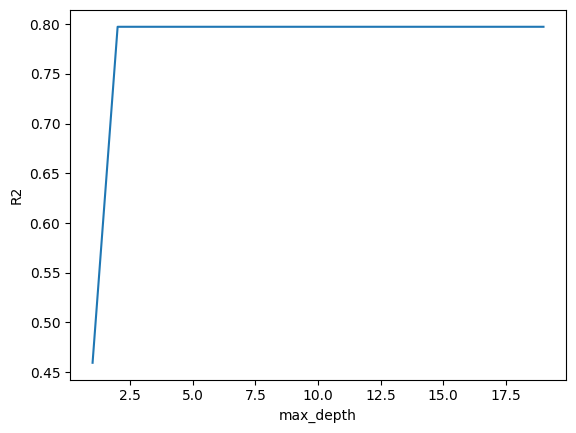

In [58]:
# Decision Tree Tuning - max_depth

# Try different values for max_depth and determine the optimal value based on the best (highest) r2 value.

# List of values to try for max_depth:
max_depth_range = list(range(1, 20)) # will try every value between 1 and 20
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    # Make an instance of the model
    dec_tree = DecisionTreeClassifier(max_depth = depth, random_state=42)

    # Make pipeline with model
    dec_pipe = make_pipeline(col_trans, dec_tree)

    # Fit training data to model in pipeline
    dec_pipe.fit(X_train, y_train)

    # Evaluate the default Decision Tree Classifier Model
    dec_train_score = dec_pipe.score(X_train, y_train)
    dec_test_score = dec_pipe.score(X_test, y_test)
    r2.append(dec_test_score)

# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Changing max_depth of 2 or above had no affect on improving the model

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

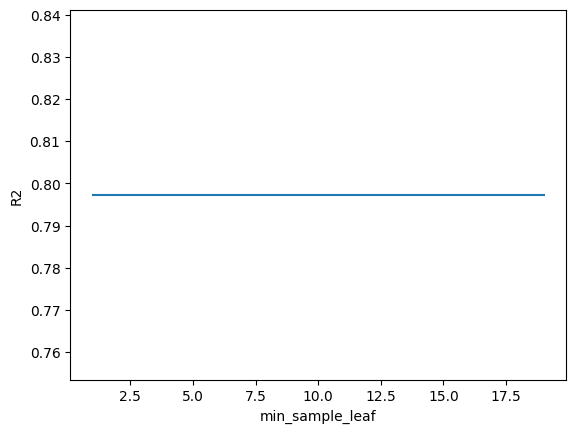

In [59]:
# Decision Tree Tuning - 'min_sample_leaf'

# Try different values for min_sample_leaf and determine the optimal value based on the best (highest) r2 value.

# List of values to try for min_samp:
min_range = list(range(1, 20)) # will try every value between 1 and 20
# List to store the score for each value of min_samp:
r2 = []
for min_samp in min_range:
    # Make an instance of the model
    dec_tree = DecisionTreeClassifier(min_samples_leaf = min_samp, random_state=42)

    # Make pipeline with model
    dec_pipe = make_pipeline(col_trans, dec_tree)

    # Fit training data to model in pipeline
    dec_pipe.fit(X_train, y_train)

    # Evaluate the default Decision Tree Classifier Model
    dec_train_score = dec_pipe.score(X_train, y_train)
    dec_test_score = dec_pipe.score(X_test, y_test)
    r2.append(dec_test_score)

# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(min_range, r2)
plt.xlabel('min_sample_leaf')
plt.ylabel('R2');

Tuning the min_sample_leaf had no affect on the R2 of the test set

1. Tuning the min_sample_leaf, and max_depth did not improve the decision tree model.
2. Making a new Decision Tree Classification model with hyperparameters tested here that are different from default would not improve the model.

#Logistic Regression Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

{0.0001: 0.7972972972972973,
 0.001: 0.7972972972972973,
 0.01: 0.7972972972972973,
 0.1: 0.7972972972972973,
 1: 0.7972972972972973,
 10: 0.7972972972972973,
 100: 0.7972972972972973,
 1000: 0.7972972972972973}

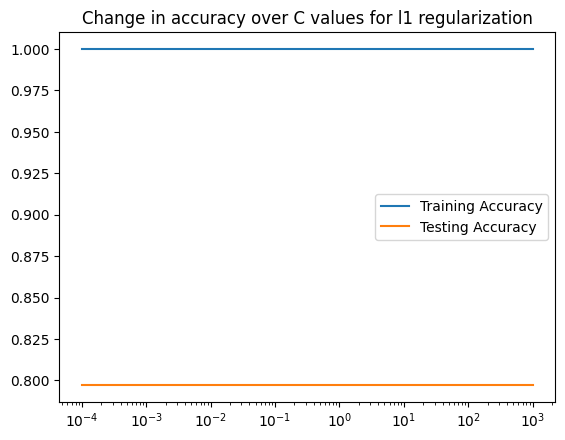

In [60]:
# L1 Tuning

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:

# instantiate a model with each value of c and fit it on the data
  # Make an instance of the model
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')

  # Make pipeline with model
  logreg_pipe = make_pipeline(col_trans, dec_tree)

  # Fit pipeline with model to training data
  logreg_pipe.fit(X_train, y_train)

# add the training and testing scores to our scores lists
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)

ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')

# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

L1 Tuning did not improve the testing accuracy in this model

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

{0.0001: 0.7972972972972973,
 0.001: 0.7972972972972973,
 0.01: 0.7972972972972973,
 0.1: 0.7972972972972973,
 1: 0.7972972972972973,
 10: 0.7972972972972973,
 100: 0.7972972972972973,
 1000: 0.7972972972972973}

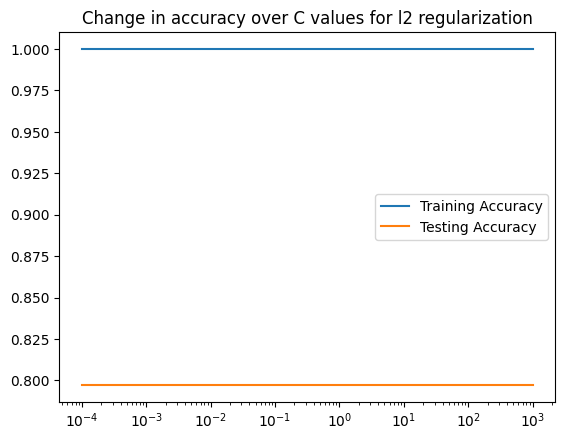

In [61]:
# L2 Tuning

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

#iterative over the c values
for c in c_values:
# instantiate a model with each value of c and fit it on the data
  logreg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')

  # Make pipeline with model
  logreg_pipe = make_pipeline(col_trans, dec_tree)

  # Fit pipeline with model to training data
  logreg_pipe.fit(X_train, y_train)

# add the training and testing scores to our scores lists
  train_scores.append(logreg_pipe.score(X_train, y_train))
  test_scores.append(logreg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Hyperparameter tuning of l1 and l2 on the logistical regression model did not improve testing performance.

Source: https://towardsdatascience.com/hyper-parameter-tuning-and-model-selection-like-a-movie-star-a884b8ee8d68

1. Tuning this Logistical Regression Model did not change the accuracy of the testing set
2. There is no need to make a Logistical Regression Model with hyperparameters that deviate from default

# KNN Classifier Tuning

With KNN tuning parameters to test can include n_neighbors, p(1 or 2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

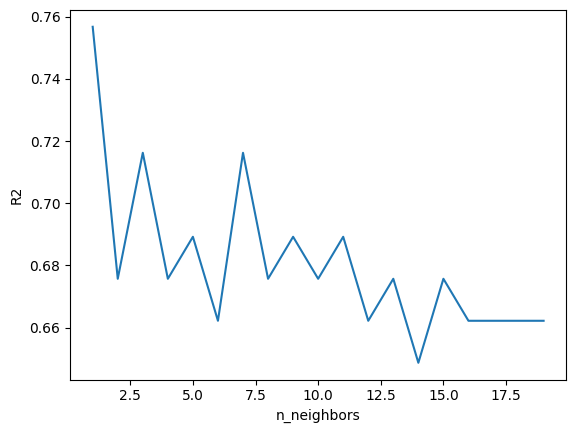

In [62]:
# KNN Tuning

# Try different values for n_neighbors and determine the optimal value based on the best (highest) r2 value.

# List of values to try for max_depth:
n_neighbor_range = list(range(1, 20)) # will try every value between 1 and 20
# List to store the score for each value of max_depth:
r2 = []
for n in n_neighbor_range:
    # Make an instance of the model
    knn = KNeighborsClassifier(n_neighbors = n, p=2)

    # Make pipeline with model
    knn_pipe = make_pipeline(col_trans, knn)

    # Fit training data to model in pipeline
    knn_pipe.fit(X_train, y_train)

    # Evaluate the default Decision Tree Classifier Model
    knn_train_score = knn_pipe.score(X_train, y_train)
    knn_test_score = knn_pipe.score(X_test, y_test)
    r2.append(knn_test_score)

# Visualize which n_neighbors leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(n_neighbor_range, r2)
plt.xlabel('n_neighbors')
plt.ylabel('R2');

If we use a KNN classifier model with 1 nearest neighbor, we obtain a slight increase in accuracy of our testing data with this model

In [63]:
# Building a new KNN Classifier Model with n_neighbor parameter set at 1

# Instantiate the model
knn_2 = KNeighborsClassifier(n_neighbors=1,p=2)

# Make pipeline with model
knn2_pipe = make_pipeline(col_trans, knn_2)
knn2_pipe

# Fit the model to the training data
knn2_pipe.fit(X_train, y_train)

# Predict the target values for the training set and the test test (optional)
knn2_train_preds = knn2_pipe.predict(X_train)
knn2_test_preds = knn2_pipe.predict(X_test)

# Evaluate the default Decision Tree Classifier Model
knn2_train_score = knn2_pipe.score(X_train, y_train)
knn2_test_score = knn2_pipe.score(X_test, y_test)

print(f'Logistic Regression Train Score: {knn2_train_score}')
print(f'Logisitic Regression Test Score: {knn2_test_score}')

Logistic Regression Train Score: 1.0
Logisitic Regression Test Score: 0.7567567567567568


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Best Accuracy Between Classifier Models
When comparing the best default or best hyperparameter tuning of each model we get the following test accuracy scores

1. Decision Tree Classifier = 0.797
2. Logistic Regression = 0.743
3. KNN Classifier = 0.757

# Confusion Matricies

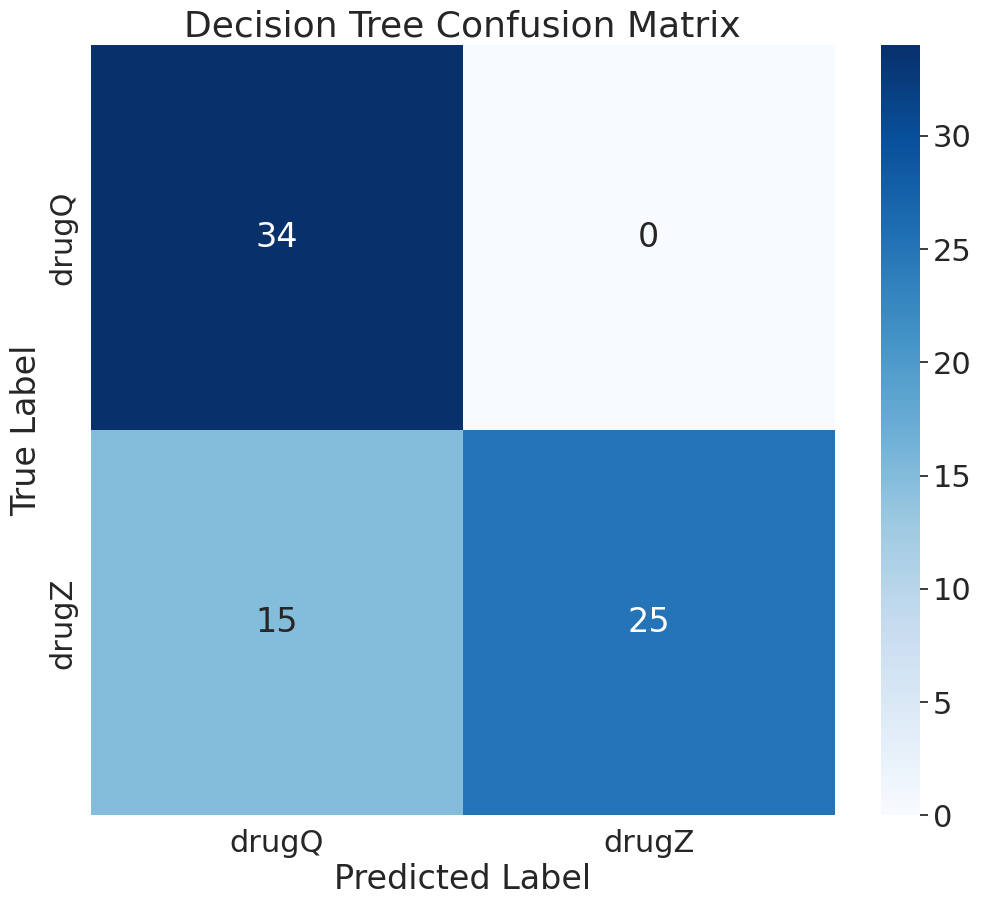

In [64]:
#Creating confusion matrix for Decision Tree Classifier

# Make Decision Tree Classifier Matrix Array
dec_tree_cm = confusion_matrix(y_test, dec_test_preds, labels=dec_tree.classes_)

# Set seaborn plotting aesthetics as default
sns.set_theme(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

# Random Forest Confusion Matrix Plot
ax = sns.heatmap(dec_tree_cm,
                 annot=True,
                 fmt='d',
                 cmap='Blues',
                 ax=None);

# Plot Settings
ax.set_title('Decision Tree Confusion Matrix', fontsize=26);
ax.set_xlabel('Predicted Label', fontsize = 24);
ax.set_ylabel('True Label', fontsize = 24);
ax.set_xticklabels(labels=('drugQ', 'drugZ'));
ax.set_yticklabels(labels=('drugQ', 'drugZ'));

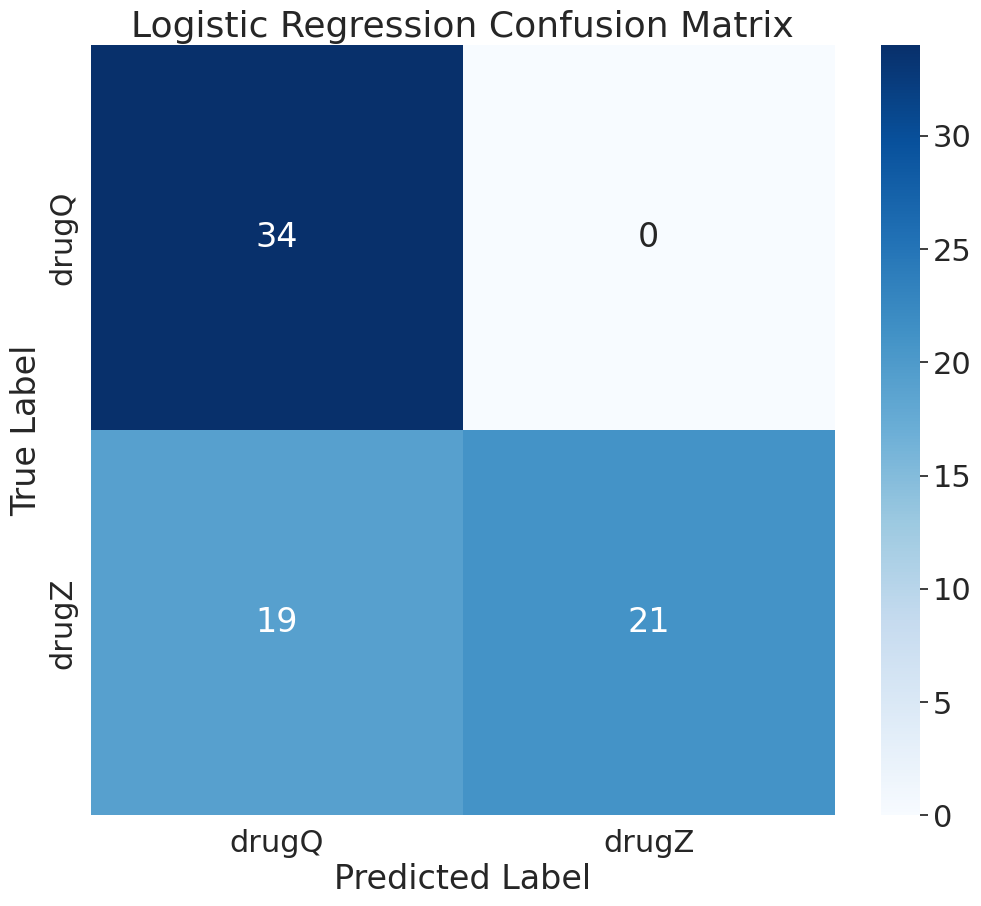

In [65]:
#Creating confusion matrix for Logistic Regression Classifier

# Make Logistic Regression Classifier Matrix Array
logreg_cm = confusion_matrix(y_test, logreg_test_preds)

# Set seaborn plotting aesthetics as default
sns.set_theme(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

# Random Forest Confusion Matrix Plot
ax = sns.heatmap(logreg_cm,
                 annot=True,
                 fmt='d',
                 cmap='Blues',
                 ax=None);

# Plot Settings
ax.set_title('Logistic Regression Confusion Matrix', fontsize=26);
ax.set_xlabel('Predicted Label', fontsize = 24);
ax.set_ylabel('True Label', fontsize = 24);
ax.set_xticklabels(labels=('drugQ', 'drugZ'));
ax.set_yticklabels(labels=('drugQ', 'drugZ'));

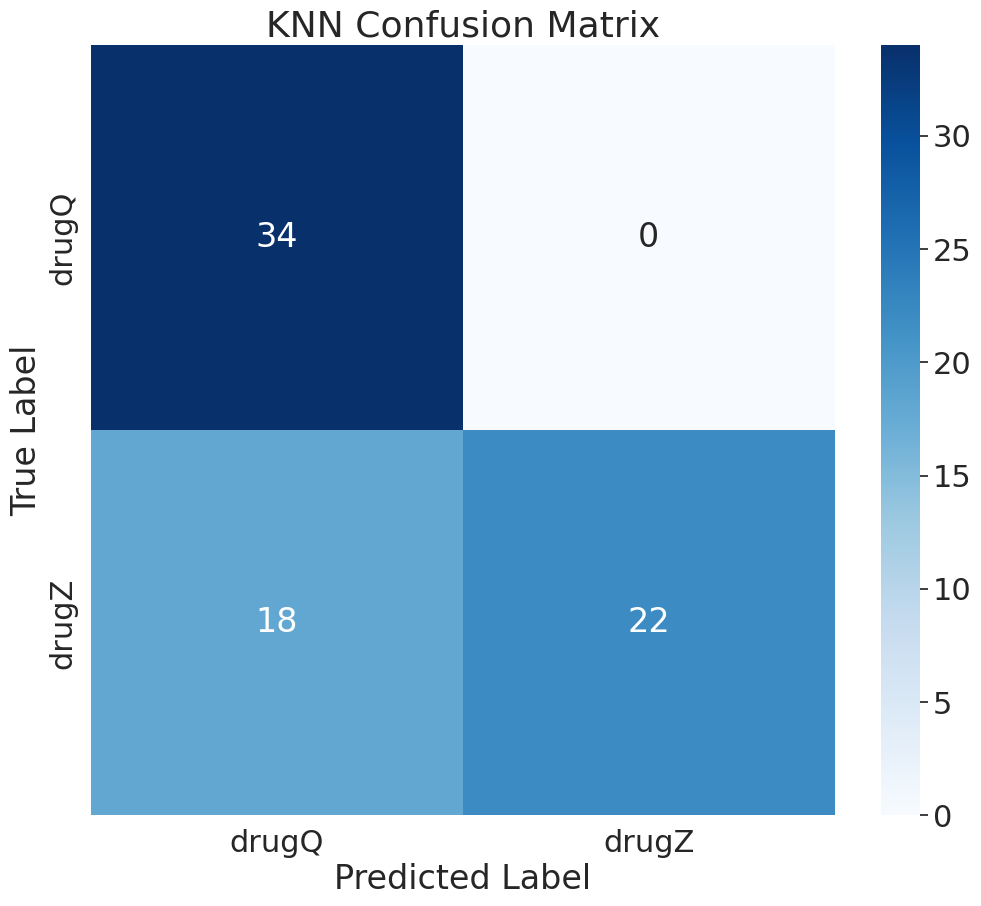

In [66]:
#Creating confusion matrix for Tuned KNN Classifier

# Make KNN Classifier Matrix Array
knn2_cm = confusion_matrix(y_test, knn2_test_preds)

# Set seaborn plotting aesthetics as default
sns.set_theme(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

# Random Forest Confusion Matrix Plot
ax = sns.heatmap(knn2_cm,
                 annot=True,
                 fmt='d',
                 cmap='Blues',
                 ax=None);

# Plot Settings
ax.set_title('KNN Confusion Matrix', fontsize=26);
ax.set_xlabel('Predicted Label', fontsize = 24);
ax.set_ylabel('True Label', fontsize = 24);
ax.set_xticklabels(labels=('drugQ', 'drugZ'));
ax.set_yticklabels(labels=('drugQ', 'drugZ'));

Note: All 3 models showed 0 false positives for a situation where it would be predicted to give drugZ but instead drugQ is acutually given. The Decision Tree Classifier provided the most accurate model according to accuracy score and in looking at the confusion matricies.

# Specificity, Sensitivity and Precision

In [67]:
# Defining True Positivies (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for each model

# Defining Decision Tree Classifier
TP_DT = dec_tree_cm[(1,1)]
TN_DT = dec_tree_cm[(0,0)]
FP_DT = dec_tree_cm[(0,1)]
FN_DT = dec_tree_cm[(1,0)]

print(f'TP_DT: {TP_DT}')
print(f'TN_DT: {TN_DT}')
print(f'FP_DT: {FP_DT}')
print(f'FN_DT: {FN_DT}')
print('\n')

TP_LR = logreg_cm[(1,1)]
TN_LR = logreg_cm[(0,0)]
FP_LR = logreg_cm[(0,1)]
FN_LR = logreg_cm[(1,0)]

print(f'TP_LR: {TP_LR}')
print(f'TN_LR: {TN_LR}')
print(f'FP_LR: {FP_LR}')
print(f'FN_LR: {FN_LR}')
print('\n')

TP_KNN = knn2_cm[(1,1)]
TN_KNN = knn2_cm[(0,0)]
FP_KNN = knn2_cm[(0,1)]
FN_KNN = knn2_cm[(1,0)]

print(f'TP_KNN: {TP_KNN}')
print(f'TN_KNN: {TN_KNN}')
print(f'FP_KNN: {FP_KNN}')
print(f'FN_KNN: {FN_KNN}')

TP_DT: 25
TN_DT: 34
FP_DT: 0
FN_DT: 15


TP_LR: 21
TN_LR: 34
FP_LR: 0
FN_LR: 19


TP_KNN: 22
TN_KNN: 34
FP_KNN: 0
FN_KNN: 18


In [68]:
# Sensitivity = True Positives / True Positives + False Negatives

DT_Sensitivity = TP_DT/(TP_DT + FN_DT)
print(f'Decision Tree Sensitivity: {DT_Sensitivity}')

LR_Sensitivity = TP_LR/(TP_LR + FN_LR)
print(f'Logistical Regression Sensitivity: {LR_Sensitivity}')

KNN_Sensitivity = TP_KNN/(TP_KNN + FN_KNN)
print(f'KNN Sensitivity: {KNN_Sensitivity}')

Decision Tree Sensitivity: 0.625
Logistical Regression Sensitivity: 0.525
KNN Sensitivity: 0.55


In [69]:
# Specificity = True Negatives/True Negatives + False Positives

DT_Specificity = TN_DT/(TN_DT + FP_DT)
print(f'Decision Tree Specificity: {DT_Specificity}')

LR_Specificity = TN_LR/(TN_LR + FP_LR)
print(f'Logistical Regression Specificity: {LR_Specificity}')

KNN_Specificity = TN_KNN/(TN_KNN + FP_KNN)
print(f'KNN Specificity: {KNN_Specificity}')

Decision Tree Specificity: 1.0
Logistical Regression Specificity: 1.0
KNN Specificity: 1.0


In [70]:
# Precision = True Positives / True Positives + False Positives

DT_Precision = TP_DT/(TP_DT + FP_DT)
print(f'Decision Tree Precision: {DT_Precision}')

LR_Precision = TP_LR/(TP_LR + FP_LR)
print(f'Logistical Regression Precision: {LR_Precision}')

KNN_Precision = TP_KNN/(TP_KNN + FP_KNN)
print(f'KNN Precision: {KNN_Precision}')

Decision Tree Precision: 1.0
Logistical Regression Precision: 1.0
KNN Precision: 1.0


Sensitivity is highest in the Decision Tree and Precision and Specificity are all 100% in all models because all 3 models did not have any Type I errors (False Positives), that is in no case was there a model that predicted a person should receive drugZ and they instead received drugQ. However, there are cases in each model where a person was predicted to receive drugQ but instead received drugZ.

# ROC AUC Scores
The Area Under the ROC Curve (AUC) is a way to quantify how well-defined our classes are. The higher the AUC, the better your classifier is doing at predicting the difference between the classes.

In [71]:
# Calculate ROC AUC for Decision Tree Classifier
print(f'Decision Tree Training AUC: {roc_auc_score(y_train, dec_pipe.predict_proba(X_train)[:,1]).round(5)}')
print(f'Decision Tree Testing AUC: {roc_auc_score(y_test, dec_pipe.predict_proba(X_test)[:,1]).round(5)}')

Decision Tree Training AUC: 1.0
Decision Tree Testing AUC: 0.8125


In [72]:
# Calculate ROC AUC for Logistical Regression Tree Classifier
print(f'Logistical Regression Tree Training AUC: {roc_auc_score(y_train, logreg_pipe.predict_proba(X_train)[:,1]).round(5)}')
print(f'Logistical Regression Tree Testing AUC: {roc_auc_score(y_test, logreg_pipe.predict_proba(X_test)[:,1]).round(5)}')

Logistical Regression Tree Training AUC: 1.0
Logistical Regression Tree Testing AUC: 0.8125


In [73]:
# Calculate ROC AUC for KNN Classifier
print(f'KNN Classifier Training AUC: {roc_auc_score(y_train, knn2_pipe.predict_proba(X_train)[:,1]).round(5)}')
print(f'KNN Classifier Tree Testing AUC: {roc_auc_score(y_test, knn2_pipe.predict_proba(X_test)[:,1]).round(5)}')

KNN Classifier Training AUC: 1.0
KNN Classifier Tree Testing AUC: 0.775


The ROC AUC score for the Decision Tree and Logistical Regression Tree were the same and performed better than the tuned KNN Classifier model.

# ROC AUC Curves

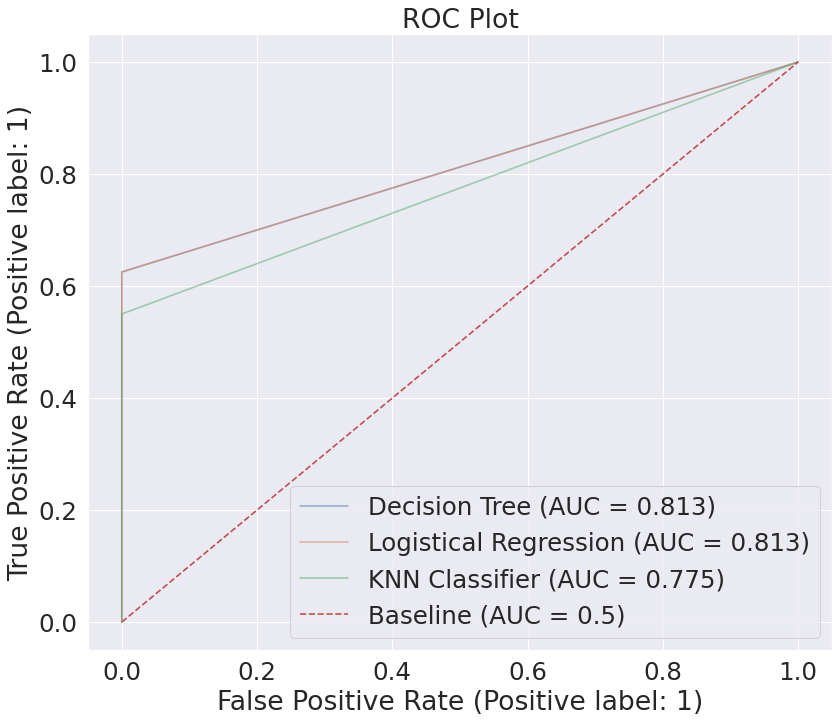

In [74]:
# Make plot showing baseline and model ROC

x_base = [0, 0.25, 0.5, 0.75, 1.00]
y_base = [0, 0.25, 0.5, 0.75, 1.00]

# set style
sns.set_style("darkgrid")

# set figure size and resolution)
plt.figure(figsize= (12, 10), dpi = 80)

# name first plot and second plot which will overlay first plot
ax = plt.gca()
dec_plot = RocCurveDisplay.from_estimator(dec_pipe, X_test, y_test, ax=ax, alpha=0.5, label = 'Decision Tree (AUC = 0.813)')
dec_plot = RocCurveDisplay.from_estimator(dec_pipe, X_test, y_test, ax=ax, alpha=0.5, label = 'Logistical Regression (AUC = 0.813)')
knn_plot = RocCurveDisplay.from_estimator(knn2_pipe, X_test, y_test, ax=ax, alpha=0.5, label = 'KNN Classifier (AUC = 0.775)')
base_plot = plt.plot(x_base, y_base, ls = '--', label = 'Baseline (AUC = 0.5)')

plt.title('ROC Plot')
plt.legend();
plt.show();

Our exploratory data and our confusion matricies on all three models revealed that drugQ was only ever given to people with low Na/K ratios and who have high blood pressure.  It seems there is something critical about this combination that suggests that giving drugZ to someone with high blood pressure combined with a low Na/K would be harmful or ineffective. We don't know the consequence of giving one drug or the other to any given population.

---
All models performed similarly where the training data was overfit and despite trying to tune hyperparameters, in Logistical Regression and Deciscion Tree models, we could not improve the default model. KNN Classifier model could only be slightly improved from the default but still could not outperform the other two models in terms of accuracy.


The Decision Tree Classifier Model also had the highest level of Sensitivity because it produced the least number of false negatives. Tuning the model to increase Sensitivity would be good. It is difficult to know if tuning the model in such a way would produce false positives and if those false positives would be a detrimental event.

#I select the Decision Tree Classification Model (w/ default hyperparameters)as the best choice, of the models tested, for determining which drug should be administered to specific patients. This choice is based on superior accuracy, sensitivity, and AUC ROC values.